- Country : Country
- Year : Year
- Status : Country Developed or Developing status
- Life expectancy : Life expectancy in age
- Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths : Number of Infant Deaths per 1000 population
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) -percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles : Measles - number of reported cases per 1000 population
- BMI : Average Body Mass Index of entire population
- under-five deaths : Number of under-five deaths per 1000 population
- Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP : Gross Domestic Product per capita (in USD)
- Population : Population of the country
- thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling : Number of years of Schooling(years)

Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

EDA

In [2]:
df0 = pd.read_csv("Life Expectancy Data.csv")
df = df0.copy()

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df[df.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.000,2007.519,4.614,2000.000,2004.000,2008.000,2012.000,2015.000
Life expectancy,2928.000,69.225,9.524,36.300,63.100,72.100,75.700,89.000
Adult Mortality,2928.000,164.796,124.292,1.000,74.000,144.000,228.000,723.000
infant deaths,2938.000,30.304,117.927,0.000,0.000,3.000,22.000,1800.000
Alcohol,2744.000,4.603,4.052,0.010,0.877,3.755,7.703,17.870
percentage expenditure,2938.000,738.251,1987.915,0.000,4.685,64.913,441.534,19479.912
Hepatitis B,2385.000,80.940,25.070,1.000,77.000,92.000,97.000,99.000
Measles,2938.000,2419.592,11467.272,0.000,0.000,17.000,360.250,212183.000
BMI,2904.000,38.321,20.044,1.000,19.300,43.500,56.200,87.300
under-five deaths,2938.000,42.036,160.446,0.000,0.000,4.000,28.000,2500.000


In [9]:
df.describe(include=object).T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


In [11]:
df.Country.nunique()

193

In [16]:
df.Status.value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

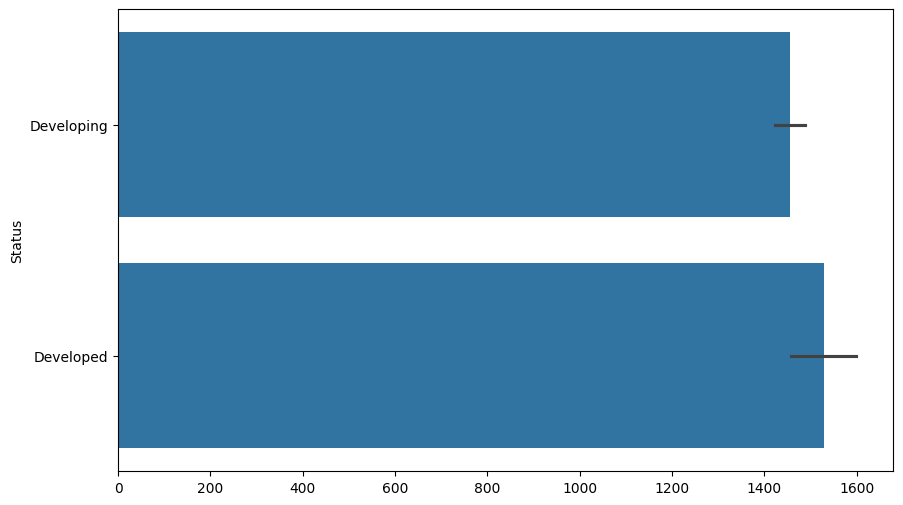

In [26]:
sns.barplot(df.Status);